In [310]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

--->**Reading the data collected from the form in csv format**

In [311]:
df=pd.read_csv("Campus Recrutements.csv")

--->**Renaming Columns**

In [312]:
df=df.rename(columns={'10th Percentage':'10_p','12th Percentage':'12_p','Graduation Year':'Grad_year','Under Graduation (Course)':'UG_Course','Current CGPA':'CGPA','Coding Experience':'Code_exp','Certificate(IF ANY)':'Certi','Programming language that you have used':'Languages','Domain you are interested in':'Domain','Have you done Competitive Coding':'Comp_Code','If so Event Name':'Event','Have you given any rounds of interview before':'Interview','Project Experience':'Proj_exp','Club Participation (if any)':'Clubs','Plan to pursue Higher Education':'Higher_ed','Aspire package':'package', 'Reg No':'Reg_no'},inplace=False)

--->**Dropping all the unusefull columns (This data is not necessary for the analysis and is added only to understand the group of people that have participated in the servey)**

In [313]:
df=df.drop(columns={'Username','package','UG_Course','Grad_year','Domain','Event','Reg_no','Languages','Interview','Clubs','Certi'})
df.columns

Index(['Name', 'Gender', '10_p', '12_p', 'CGPA', 'Backlogs', 'Code_exp',
       'Comp_Code', 'Internship', 'Proj_exp', 'Higher_ed', 'Status'],
      dtype='object')

--->Checking if there are any missing values left in the dataset.
Also if the data types are correct(float for numbers and object for strings)

In [314]:
df['CGPA'].astype(str).astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        416 non-null    object 
 1   Gender      416 non-null    object 
 2   10_p        416 non-null    float64
 3   12_p        416 non-null    float64
 4   CGPA        416 non-null    float64
 5   Backlogs    409 non-null    object 
 6   Code_exp    416 non-null    object 
 7   Comp_Code   416 non-null    object 
 8   Internship  416 non-null    object 
 9   Proj_exp    416 non-null    object 
 10  Higher_ed   416 non-null    object 
 11  Status      416 non-null    object 
dtypes: float64(3), object(9)
memory usage: 39.1+ KB


--->**Removing null values**

In [315]:
df=df.replace(np.nan,'No')
median = df['10_p'].median()
df['10_p'].fillna(median, inplace=True)
median = df['12_p'].median()
df['12_p'].fillna(median, inplace=True)
median = df['CGPA'].median()
df['CGPA'].fillna(median, inplace=True)

In [316]:
print('Data columns with null values:',df.isnull().sum(), sep = '\n')

Data columns with null values:
Name          0
Gender        0
10_p          0
12_p          0
CGPA          0
Backlogs      0
Code_exp      0
Comp_Code     0
Internship    0
Proj_exp      0
Higher_ed     0
Status        0
dtype: int64


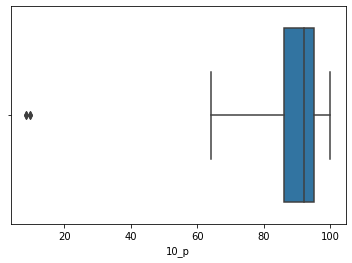

In [317]:
# Removing outliers
# detecting outliers - target value
# boxplot
sns.boxplot(data=df, x="10_p",whis=2.7)
plt.show()

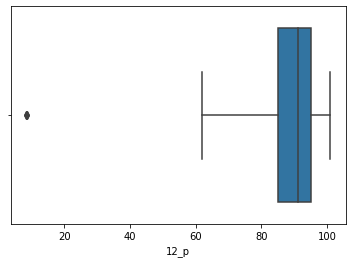

In [318]:
sns.boxplot(data=df, x="12_p",whis=2.7)
plt.show()

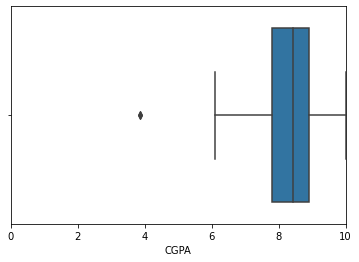

In [319]:
sns.boxplot(data=df, x="CGPA",whis=2)
plt.xlim(0, 10)
plt.show()

--->**Seperate categorical and numerical columns**

In [320]:
df_cat = df.select_dtypes(object)
df_num = df.select_dtypes("float64")

In [321]:
df_cat.head()

,Name,Gender,Backlogs,Code_exp,Comp_Code,Internship,Proj_exp,Higher_ed,Status
0,nahar singh,Female,No,Beginner,No,No,None,No,No
1,rampaal,Male,Yes,Beginner,Yes,No,None,Yes,Yes
2,Vainavi,Female,No,Intermediate,Yes,No,1-2,Yes,Yes
3,Ch.venkata surendra,Male,Yes,Intermediate,No,No,4+,No,Yes
4,Pushpa Sanghvi,Female,No,Beginner,Yes,Yes,None,Yes,No


In [322]:
df_num.head()

,10_p,12_p,CGPA
0,100.0,98.0,7.80
1,83.5,80.7,7.80
2,94.0,91.0,9.47
3,99.0,98.0,6.30
4,95.0,94.0,7.70


--->**Fetching all the column names**

In [323]:
for col in df_cat:
  print(col)

Name
Gender
Backlogs
Code_exp
Comp_Code
Internship
Proj_exp
Higher_ed
Status


In [324]:
df['Gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [325]:
df['Backlogs'].unique()

array(['No', 'Yes'], dtype=object)

In [326]:
df['Code_exp'].unique()

array(['Beginner', 'Intermediate', 'Advanced'], dtype=object)

In [327]:
df['Comp_Code'].unique()

array(['No', 'Yes'], dtype=object)

In [328]:
df['Internship'].unique()

array(['No', 'Yes'], dtype=object)

In [329]:
df['Proj_exp'].unique()

array(['None', '1-2', '4+', '3-4'], dtype=object)

In [330]:
df['Higher_ed'].unique()

array(['No', 'Yes', 'None'], dtype=object)

In [331]:
skewValue = df.skew(axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [332]:
#one Hot encoding
for col in df_cat:
  label_encoder = LabelEncoder()
  integer_encoded = label_encoder.fit_transform(df[col])
  onehot_encoder = OneHotEncoder(sparse=False)
  integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
  df_cat[col] = onehot_encoder.fit_transform(integer_encoded)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

10_p = -4.580850811071263


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


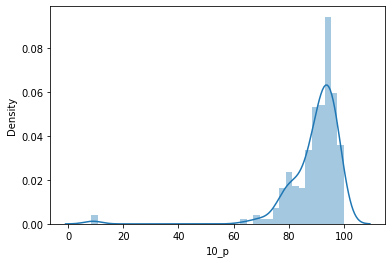

************************************************
12_p = -4.520737397256094


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


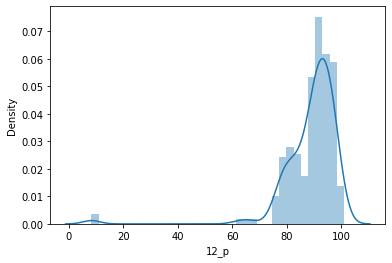

************************************************
CGPA = -0.9430907025911274


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


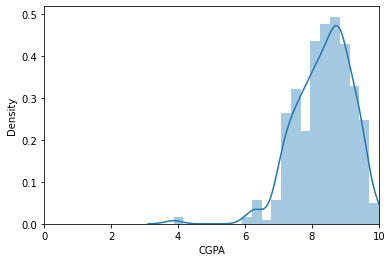

************************************************


In [333]:
from scipy.stats import skew
for col in df_num:
  try:
    if col!='CGPA':
      print(col, "=", skew(df_num[col]))
      sns.distplot(df_num[col])
      plt.show()
    else:
      print(col, "=", skew(df_num[col]))
      sns.distplot(df_num[col])
      plt.xlim(0, 10)
      plt.show()
  except:
    pass
  finally:
    print("************************************************")

--->**#Scaling of data**

In [334]:
from sklearn.preprocessing import StandardScaler
for col in df_num:
  ss = StandardScaler()
  df_num[col] = ss.fit_transform(df_num[[col]])
df_num.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

,10_p,12_p,CGPA
0,1.006250,0.866076,-0.647454
1,-0.570992,-0.780750,-0.647454
2,0.432707,0.199730,1.324485
3,0.910659,0.866076,-2.418656
4,0.528298,0.485307,-0.765534


--->**merge data frames to make it complete**

In [335]:
new_df = pd.concat([df_num, df_cat], axis=1)

--->**spliting of data - train and test**

In [336]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
x = new_df.drop('Status',axis=1)
y = new_df['Status']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

--->**Checking the accuracy of logistic regression classifier on test set**

In [337]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logr = LogisticRegression()
logr.fit(x_train, y_train)
y_pred = logr.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logr.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.58


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


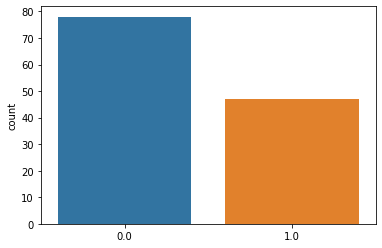

In [338]:
fig=sns.countplot(y_pred)

--->**Checking the accuracy of Decision Tree classifier on test set**

In [339]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_hat = dt.predict(x_test)
print("R2 = ", r2_score(y_test, y_hat))

R2 =  -0.19236883942766303


In [340]:
dt1 = DecisionTreeClassifier(criterion="gini", max_depth=3)
dt1.fit(x_train,y_train)
y_pred = dt1.predict(x_test)
print("Accuracy of Decision Tree Classifier on Test set:",metrics.accuracy_score(y_test, y_pred))

Accuracy of Decision Tree Classifier on Test set: 0.544


:(a) Logistic Regression = 0.69
(b) Decision Tree Classifier= 0.728

(60.0, 100.0)

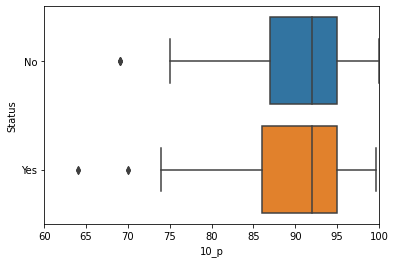

In [341]:
fig=sns.boxplot(data=df, x="10_p",y="Status")
plt.xlim(60, 100)

(60.0, 100.0)

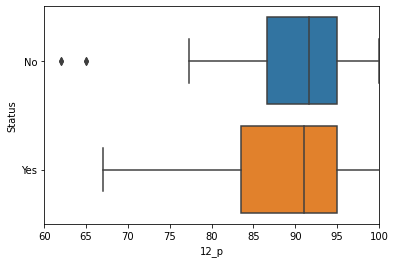

In [342]:
fig=sns.boxplot(data=df, x="12_p",y="Status")
plt.xlim(60, 100)

(5.0, 10.0)

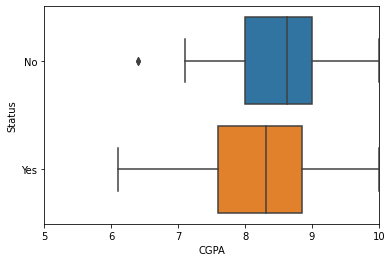

In [343]:
fig=sns.boxplot(data=df, x="CGPA",y="Status")
plt.xlim(5, 10)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


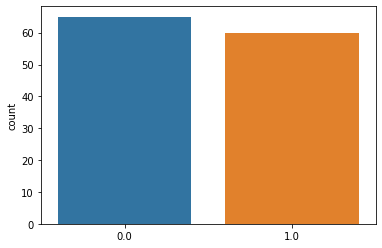

In [344]:
fig=sns.countplot(y_pred)

In [345]:
df=df.tail(125)

In [346]:
df['pred']=y_pred

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [347]:
newdf = df[(df.pred == 1)]

In [348]:
newdf

,Name,Gender,10_p,12_p,CGPA,Backlogs,Code_exp,Comp_Code,Internship,Proj_exp,Higher_ed,Status,pred
291,Kushal Gopal,Male,79.10,86.6,7.41,No,Beginner,Yes,No,None,No,Yes,1.0
292,Jyothi,Female,93.00,80.0,8.10,No,Beginner,No,No,None,Yes,Yes,1.0
294,Amrita Gera,Female,91.20,90.3,8.00,No,Beginner,No,Yes,None,Yes,No,1.0
298,kushal,Male,85.00,88.0,8.00,No,Beginner,Yes,No,None,No,Yes,1.0
300,Siddhant Saxena,Male,94.60,94.6,7.31,No,Intermediate,Yes,No,None,Yes,Yes,1.0
302,Hema Prakash S,Male,96.40,94.2,8.83,No,Intermediate,Yes,No,1-2,Yes,Yes,1.0
305,komal yadav,Female,98.40,89.8,7.60,No,Advanced,Yes,No,3-4,Yes,Yes,1.0
310,vikram singh,Male,93.20,92.0,9.00,No,Intermediate,No,No,None,Yes,No,1.0
311,Biren Chia,Male,89.00,92.0,8.97,No,Beginner,Yes,No,4+,Yes,Yes,1.0
313,sandeep,Male,77.30,82.7,7.30,No,Beginner,No,No,None,No,Yes,1.0


In [349]:
newdf.replace('Yes',1,inplace=True)
newdf.replace('No',0,inplace=True)
newdf.replace('Beginner',0,inplace=True)
newdf.replace('Intermediate',1,inplace=True)
newdf.replace('Advance',1,inplace=True)
newdf.replace('None',0,inplace=True)
newdf.replace('3-4',1,inplace=True)
newdf.replace('4+',1,inplace=True)
newdf.replace('1-2',1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [350]:
for i in range(0,len(newdf)):
  x=newdf.iloc[[i]]
  print("\n",x['Name'].item(),":")
  if(x['10_p'].item()>=80):
    print("has ",x['10_p'].item()," percentage in 10th, ")
  if(x['12_p'].item()>=80):
    print(x['12_p'].item()," percentage in 12th, ")
  if(x['CGPA'].item()>=8):
    print(x['CGPA'].item()," CGPA, ")
  if(x['Backlogs'].item()==0):
    print("no backlogs, ")
  if(x['Comp_Code'].item()==1):
    print("does competetive coding, ")
  if(x['Code_exp'].item()==1):
    print("Intermediate/Advance Coding Experience, ")
  if(x['Internship'].item()==1):
    print("has done a Internship, ")
  if(x['Proj_exp'].item()==1):
    print("has been a part of multiple projects")

  print("due to which he got placed\n")
  print("------------------------------------------------- ")


 Kushal Gopal :
86.6  percentage in 12th, 
no backlogs, 
does competetive coding, 
due to which he got placed

------------------------------------------------- 

 Jyothi :
has  93.0  percentage in 10th, 
80.0  percentage in 12th, 
8.1  CGPA, 
no backlogs, 
due to which he got placed

------------------------------------------------- 

 Amrita Gera :
has  91.2  percentage in 10th, 
90.3  percentage in 12th, 
8.0  CGPA, 
no backlogs, 
has done a Internship, 
due to which he got placed

------------------------------------------------- 

 kushal :
has  85.0  percentage in 10th, 
88.0  percentage in 12th, 
8.0  CGPA, 
no backlogs, 
does competetive coding, 
due to which he got placed

------------------------------------------------- 

 Siddhant Saxena :
has  94.6  percentage in 10th, 
94.6  percentage in 12th, 
no backlogs, 
does competetive coding, 
Intermediate/Advance Coding Experience, 
due to which he got placed

------------------------------------------------- 

 Hema Prakash S :

In [351]:
newdf = df[(df.pred == 0)]
newdf.replace('Yes',1,inplace=True)
newdf.replace('No',0,inplace=True)
newdf.replace('Beginner',0,inplace=True)
newdf.replace('Intermediate',1,inplace=True)
newdf.replace('Advance',1,inplace=True)
newdf.replace('None',0,inplace=True)
newdf.replace('3-4',1,inplace=True)
newdf.replace('4+',1,inplace=True)
newdf.replace('1-2',1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [352]:
for i in range(0,len(newdf)):
  x=newdf.iloc[[i]]
  print("\n",x['Name'].item(),":")
  if(x['10_p'].item()<80):
    print("has ",x['10_p'].item()," percentage in 10th, ")
  if(x['12_p'].item()<80):
    print(x['12_p'].item()," percentage in 12th, ")
  if(x['CGPA'].item()<8):
    print(x['CGPA'].item()," CGPA ---> Try increasing CGPA, ")
  if(x['Backlogs'].item()==1):
    print("has backlogs --->Clear your back log as soon as possible, ")
  if(x['Comp_Code'].item()==0):
    print("You do not do Competetive coding --->Start as soon as possible, ")
  if(x['Code_exp'].item()==0):
    print("Beginner Coding Experience --->practice DSA, ")
  if(x['Internship'].item()==0):
    print("You dont have an Internship --->Try finding one, ")
  if(x['Proj_exp'].item()==0):
    print("You have nod done any projects ---> Start working on some projects, ")

  print("Due to these reasons you were not placed\n")
  print("------------------------------------------------- ")


 A.S. Sayed shakeel :
has backlogs --->Clear your back log as soon as possible, 
Beginner Coding Experience --->practice DSA, 
You dont have an Internship --->Try finding one, 
You have nod done any projects ---> Start working on some projects, 
Due to these reasons you were not placed

------------------------------------------------- 

 manoj :
Beginner Coding Experience --->practice DSA, 
You dont have an Internship --->Try finding one, 
You have nod done any projects ---> Start working on some projects, 
Due to these reasons you were not placed

------------------------------------------------- 

 Akshi Vaidya :
7.15  CGPA ---> Try increasing CGPA, 
has backlogs --->Clear your back log as soon as possible, 
You do not do Competetive coding --->Start as soon as possible, 
You dont have an Internship --->Try finding one, 
Due to these reasons you were not placed

------------------------------------------------- 

 Yasmin Varty :
7.8  CGPA ---> Try increasing CGPA, 
You do not do Co

In [353]:
x=[len(newdf[newdf['Code_exp']==0]),len(newdf[newdf['Proj_exp']==0]),len(newdf[newdf['Backlogs']==1]),len(newdf[newdf['CGPA']<8]),len(newdf[newdf['Internship']==0])]
y=["Less Code Experience","Less Project Experience","Backlogs","Less CGPA","Lack of Internship"]

In [355]:
max=0
flag1=0
flag2=0
for i in range(0,5):
  if(x[i]>max):
    max=x[i]
    flag2=flag1
    flag1=i


print("most of the students that have not gotten placed is due to",y[flag1]," and ",y[flag2])

most of the students that have not gotten placed is due to Lack of Internship  and  Less Project Experience
